In [1]:
import os
from glob import glob

import main_fte
from py_utils import data_ops
import evaluate_fte
from lib import app
from py_utils import log

%load_ext autoreload
%autoreload 2

%matplotlib inline

# root_dir = os.path.join("..", "data")
root_dir = os.path.join("/Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos")
# If you are running the code remotely on the Linux i9.
# root_dir = os.path.join("/","data", "dlc", "to_analyse", "cheetah_videos")\
logger = log.logger("main")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Generate the pose functions if this has not been done before (note this should only be performed once). It will be saved in the root_dir.
functions = main_fte.create_pose_functions(root_dir)

In [2]:
# Configurations for the optimisation. 2017_08_29/top/phantom/run1_1 2017_08_29/top/phantom/flick1_1 2019_02_27/kiara/run
# 2017_08_29/top/jules/run1_1
data_path = os.path.join("2017_08_29", "top", "jules", "run1_1")
# 2019_03_09LilyFlick
# 2019_03_09JulesFlick2
# 2017_12_16PhantomFlick2_1
# 2017_12_21/bottom/jules/flick2_1
start_frame = 10
end_frame = 110
dlc_thresh = 0.5
# filtered_markers = ()
filtered_markers = ("r_front_ankle", "r_front_paw", "r_back_ankle", "r_back_paw")
# ((10, 20), (30, 40), (40, 50), (50, 60), (20, 30), (80, 90), (90, 105))
# ((10, 20), (30, 40), (40, 50), (20, 30), (80, 90))
# ((10, 20), (50, 55), (80, 90))

In [9]:
# Run the optimisation
main_fte.run(root_dir, data_path, start_frame, end_frame, dlc_thresh, drop_out_frame_ranges = (), filtered_markers=filtered_markers, init_ekf=False, single_view=0, pairwise_included=2, generate_reprojection_videos=False, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

2021-08-23T11:32:20.636 | INFO | main_fte: Prepare data - Start


Loaded extrinsics from /Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos/2017_08_29/top/extrinsic_calib/6_cam_scene_sba.json



2021-08-23T11:32:21.214 | INFO | main_fte: Load H5 2D DLC prediction data


Found 2070 pairwise points between camera 0 and 1
Found 1729 pairwise points between camera 1 and 2
Found 1016 pairwise points between camera 2 and 3
Found 785 pairwise points between camera 3 and 4


2021-08-23T11:32:21.612 | INFO | main_fte: Estimate the initial trajectory


Found 767 pairwise points between camera 4 and 5
Found 903 pairwise points between camera 5 and 0



2021-08-23T11:32:22.044 | INFO | main_fte: Prepare data - End
2021-08-23T11:32:22.048 | INFO | main_fte: Start frame: 9, End frame: 110, Frame rate: 90
2021-08-23T11:32:22.051 | INFO | main_fte: Setup optimisation - Start
2021-08-23T11:32:23.623 | INFO | main_fte: Measurement initialisation...Done
2021-08-23T11:32:27.954 | INFO | main_fte: Variable initialisation...Done
2021-08-23T11:33:08.665 | INFO | main_fte: Constaint initialisation...Done
2021-08-23T11:33:12.607 | INFO | main_fte: Objective initialisation...Done
2021-08-23T11:33:12.611 | INFO | main_fte: Setup optimisation - End
2021-08-23T11:33:12.616 | INFO | main_fte: Initialisation took 51.97s


Ipopt 3.13.3: print_level=5
max_iter=400
max_cpu_time=10000
Tol=0.1
linear_solver=ma86
option_file_name=/var/folders/_2/61j71l3s06zfdc543275_g8w0000gn/T/tmp303bl7q5_ipopt.opt

Using option file "/var/folders/_2/61j71l3s06zfdc543275_g8w0000gn/T/tmp303bl7q5_ipopt.opt".


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.3, running with linear solver ma86.

Number of nonzeros in equality constraint Jacobian...:   802387
Number of nonzeros in inequality constraint Jacobian.:     2531
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:   106258
                     va

2021-08-23T11:41:58.525 | INFO | main_fte: Optimisation solver took 525.90s
2021-08-23T11:41:58.552 | INFO | main_fte: Generate outputs...


shutter delay: [0.0, 0.003985556231358126, -0.00019033698735263467, 0.002210312440385494, 0.005946206444923116, -0.0013146939440031459]
Saved /Users/zico/msc/dev/AcinoSet/data/2017_08_29/top/jules/run1_1/fte_pw/fte.pickle


2021-08-23T11:42:13.001 | INFO | main_fte: Done


Saved /Users/zico/msc/dev/AcinoSet/data/2017_08_29/top/jules/run1_1/fte_pw/cam*_fte.h5
Saved /Users/zico/msc/dev/AcinoSet/data/2017_08_29/top/jules/run1_1/fte_pw/cam*_fte.csv



2021-08-23T12:43:46.281 | WARNING | main_fte: No ground truth labels for this test.


Loaded extrinsics from /Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos/2017_08_29/top/extrinsic_calib/6_cam_scene_sba.json



(               count       mean        std       min       25%        50%  \
 nose           446.0   3.821173   2.471938  0.190591  2.082659   3.213389   
 r_eye          331.0   3.498064   1.958116  0.379138  1.906839   3.099069   
 l_eye          265.0   3.945454   3.052461  0.112559  1.868314   3.135198   
 neck_base      446.0   9.623861   7.688877  0.272522  4.287229   7.449093   
 spine          506.0  11.436612  42.196256  0.066827  3.931706   7.610038   
 tail_base      451.0  14.750210  44.818082  0.291895  5.856927   9.679008   
 tail1          464.0  13.444480  36.146645  0.301425  4.939299   8.487273   
 tail2          475.0  12.576696  64.582818  0.188433  2.152301   3.413843   
 r_shoulder     292.0   6.667517   3.413144  0.027631  4.023688   6.485555   
 r_front_knee   342.0   9.783398   9.064296  0.326014  4.946087   7.615946   
 r_front_ankle  445.0  15.753520  15.986168  0.493939  6.245118  10.948095   
 r_front_paw    466.0  16.462268  20.807986  0.495248  6.554478 

/Users/zico/opt/anaconda3/envs/pypy/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


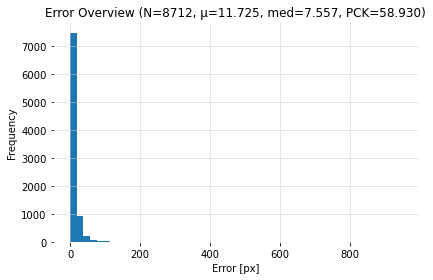

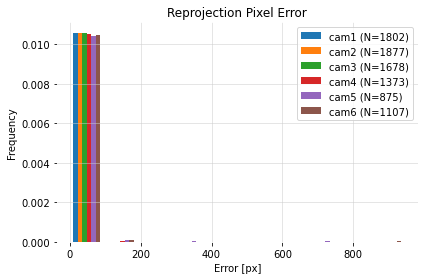

In [10]:
main_fte.metrics(root_dir, data_path, start_frame, end_frame, dlc_thresh, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

In [ ]:
dummy_scene = "/Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos/2017_08_29/top/extrinsic_calib/6_cam_scene_sba.json"
main_fte.plot_trajectory("/Users/zico/msc/dev/monocular_estimation/data/synthesized.pickle", dummy_scene)

In [ ]:
# Compare the optimisation with previous results i.e. compare the output pickle file fte.pickle. This is a visual inspection.abs
main_fte.plot_cheetah(root_dir, data_path, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

In [ ]:
# Compare the optimisation with previous results i.e. compare the output pickle file fte.pickle. This is a visual inspection.abs
main_fte.compare_cheetahs("/Users/zico/msc/dev/monocular_estimation/lily_discrete_trajectory.pickle", root_dir, data_path, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

In [ ]:
eval_dir = os.path.join("/Users/zico/msc/dev/AcinoSet/data", data_path, "fte_pw")
data = data_ops.load_pickle(os.path.join(eval_dir, "fte.pickle"))
results_dir = os.path.join(eval_dir, "evaluation")
os.makedirs(eval_dir, exist_ok=True)
max_delta_acc = evaluate_fte.eval_delta_acc(data, results_dir)
evaluate_fte.eval_model_error(data, results_dir)
evaluate_fte.eval_meas_error(data, results_dir)
logger.info(max_delta_acc)

In [ ]:
fig_fpath = os.path.join(os.path.join(os.path.join("..", "data"), data_path, "fte_pw"), 'fte.svg')
pw_file = data_ops.load_pickle(os.path.join(os.path.join("..", "data"), data_path, "fte_pw", "fte.pickle"))
app.plot_cheetah_states(pw_file["x"], out_fpath=fig_fpath)

In [ ]:
main_fte.plot_cost_functions()